<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/12)_Ontario_%26_New_York_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import essential packages for preprocessing steps
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
import matplotlib.colors as mcolors
# Mounting google colab on drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ontario = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OxCGRT_Ontario.csv')
ontario['Date'] = pd.to_datetime(ontario['Date']) # converting to datetime
ontario['Date'] = ontario['Date'].dt.date # converting to just Year-Month-Day format 


newyork = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OxCGRT_New York.csv')
newyork['Date'] = pd.to_datetime(newyork['Date']) # converting to datetime
newyork['Date'] = newyork['Date'].dt.date # converting to just Year-Month-Day format 
newyork.Date.head(1), newyork.Date.tail(1)

(0    2020-03-01
 Name: Date, dtype: object, 456    2021-05-31
 Name: Date, dtype: object)

In [3]:
# Importing covid-19 case and mortality data over time 
case_on = pd.read_csv('https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/cases_timeseries_prov.csv')
mortalities_on = pd.read_csv('https://raw.githubusercontent.com/ccodwg/Covid19Canada/master/timeseries_prov/mortality_timeseries_prov.csv')

In [4]:
# filtering data to province and dates desired
filter1 = case_on['province'] == 'Ontario'
ontario_cases = case_on[filter1]
ontario_cases = ontario_cases[36:493]

filter2 = mortalities_on['province'] == 'Ontario'
ontario_mortalities = mortalities_on[filter2]
ontario_mortalities = ontario_mortalities[:450]

ontario_cases['date_report'] = pd.to_datetime(ontario_cases['date_report']) # converting to datetime
ontario_cases['date_report'] = ontario_cases['date_report'].dt.date # converting to just Year-Month-Day format 
ontario_cases['date_report'].head(1), ontario_cases['date_report'].tail(1)

ontario_mortalities['date_death_report'] = pd.to_datetime(ontario_mortalities['date_death_report']) # converting to datetime
ontario_mortalities['date_death_report'] = ontario_mortalities['date_death_report'].dt.date # converting to just Year-Month-Day format 
ontario_mortalities['date_death_report'].head(1), ontario_mortalities['date_death_report'].tail(1)

(4448    2020-08-03
 Name: date_death_report, dtype: object, 4897    2021-05-31
 Name: date_death_report, dtype: object)

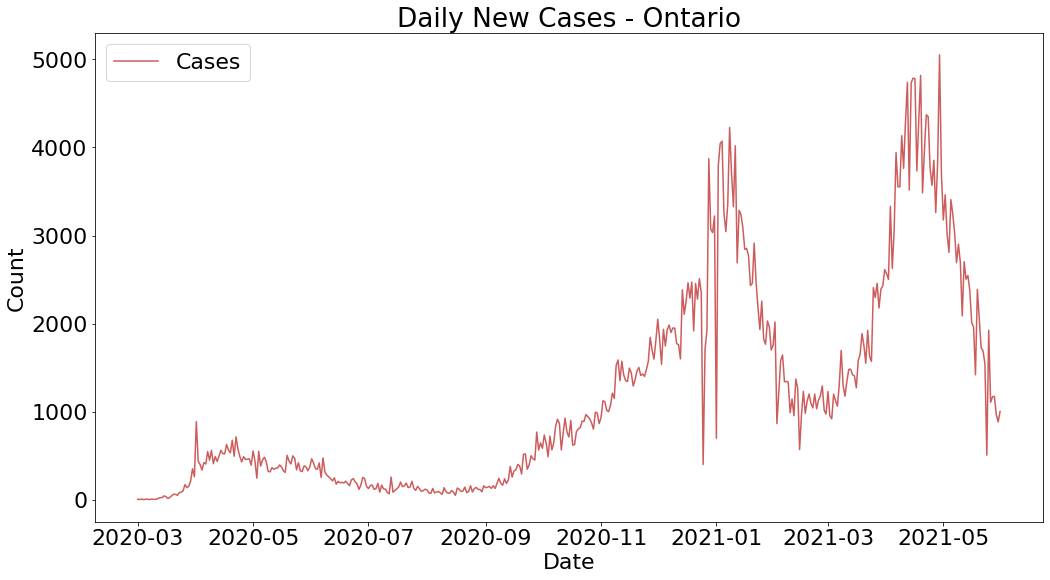

In [25]:
plt.plot(ontario['Date'].unique(), ontario_cases['cases'], label = 'Cases', color = 'indianred')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily New Cases - Ontario')
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.rcParams.update({'font.size': 22})
plt.show()

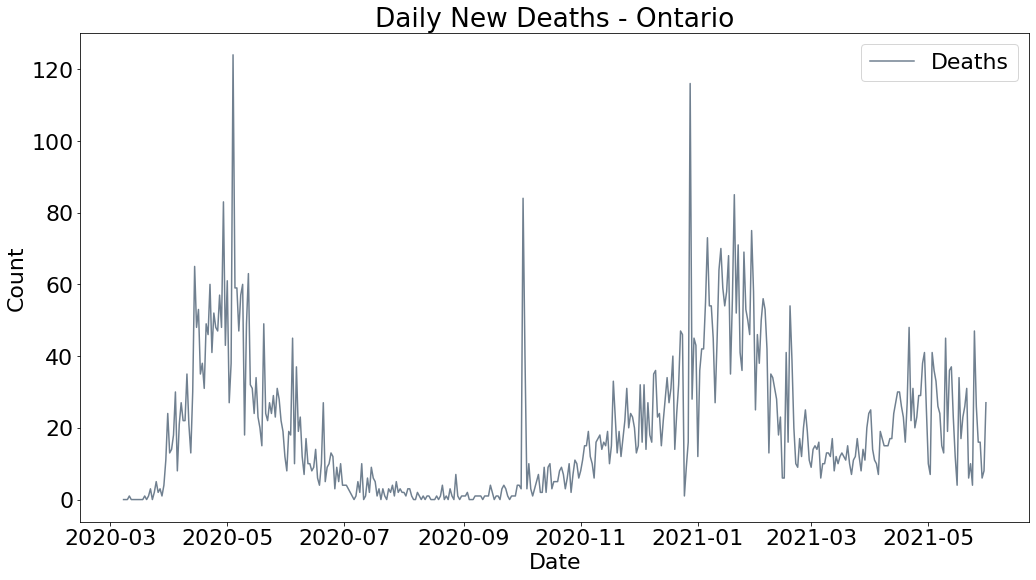

In [6]:
plt.plot(ontario['Date'][7:].unique(), ontario_mortalities['deaths'], label = 'Deaths', color = 'slategrey')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily New Deaths - Ontario')
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.rcParams.update({'font.size': 22})
plt.show()

In [7]:
# Importing covid-19 case and mortality data over time 
cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

filter1 = cases['Province_State'] == 'New York'
newyork_c = cases[filter1]
newyork_c= newyork_c.iloc[: , 50:510] # filtering to desired dates 
newyork_cas = newyork_c.T
print(newyork_cas[:3])

# filtering data to province and dates desired
filter2 = deaths['Province_State'] == 'New York'
newyork_d = deaths[filter2]
newyork_d = newyork_d.iloc[: , 50:510] # filtering to desired dates 
newyork_deat = newyork_d.T
print(newyork_deat[:3])

        1902  1903  1904  1905  1906  1907  ...  1960  1961  1962  1963  1964  1965
3/1/20     0     0     0     0     0     0  ...     0     0     0     0     0     0
3/2/20     0     0     0     0     0     0  ...     0     0     0     0     0     0
3/3/20     0     0     0     0     0     0  ...     0     0     0     1     0     0

[3 rows x 64 columns]
         1902  1903  1904  1905  1906  1907  ...  1960  1961  1962  1963  1964  1965
2/29/20     0     0     0     0     0     0  ...     0     0     0     0     0     0
3/1/20      0     0     0     0     0     0  ...     0     0     0     0     0     0
3/2/20      0     0     0     0     0     0  ...     0     0     0     0     0     0

[3 rows x 64 columns]


In [8]:
newyork_cas['cases'] = newyork_cas.sum(axis=1)

cases_ = newyork_cas['cases'] - newyork_cas['cases'].shift(1)
newyork_case = newyork_cas.copy()
newyork_case['cases_new'] = cases_
newyork_case['cases_new'] = newyork_case['cases_new'].fillna(0)
newyork_case

newyork_case.drop(newyork_case.iloc[:, :64], inplace = True, axis = 1)
newyork_cases = newyork_case.copy()
newyork_cases

,cases,cases_new
3/1/20,0,0.0
3/2/20,0,0.0
3/3/20,1,1.0
3/4/20,10,9.0
3/5/20,21,11.0
...,...,...
5/30/21,2101875,820.0
5/31/21,2102404,529.0
6/1/21,2102869,465.0
6/2/21,2103269,400.0


In [9]:
newyork_deat['deaths'] = newyork_deat.sum(axis=1)

deaths_ = newyork_deat['deaths'] - newyork_deat['deaths'].shift(1)
newyork_death = newyork_deat.copy()
newyork_death['deaths_new'] = deaths_
newyork_death['deaths_new'] = newyork_death['deaths_new'].fillna(0)
newyork_death

newyork_death.drop(newyork_death.iloc[:, :64], inplace = True, axis = 1)
newyork_deaths = newyork_death.copy()
newyork_deaths

,deaths,deaths_new
2/29/20,0,0.0
3/1/20,0,0.0
3/2/20,0,0.0
3/3/20,0,0.0
3/4/20,0,0.0
...,...,...
5/29/21,53064,15.0
5/30/21,53080,16.0
5/31/21,53098,18.0
6/1/21,53123,25.0


In [11]:
newyork_cases['datetime'] = newyork_cases.index
newyork_cases['datetime'] = pd.to_datetime(newyork_cases['datetime']) # converting to datetime
newyork_cases['datetime'] = newyork_cases['datetime'].dt.date # converting to just Year-Month-Day format 

newyork_deaths['datetime'] = newyork_deaths.index
newyork_deaths['datetime'] = pd.to_datetime(newyork_deaths['datetime']) # converting to datetime
newyork_deaths['datetime'] = newyork_deaths['datetime'].dt.date # converting to just Year-Month-Day format 
newyork_deaths['datetime'].head(1), newyork_deaths['datetime'].tail(1)

(2/29/20    2020-02-29
 Name: datetime, dtype: object, 6/2/21    2021-06-02
 Name: datetime, dtype: object)

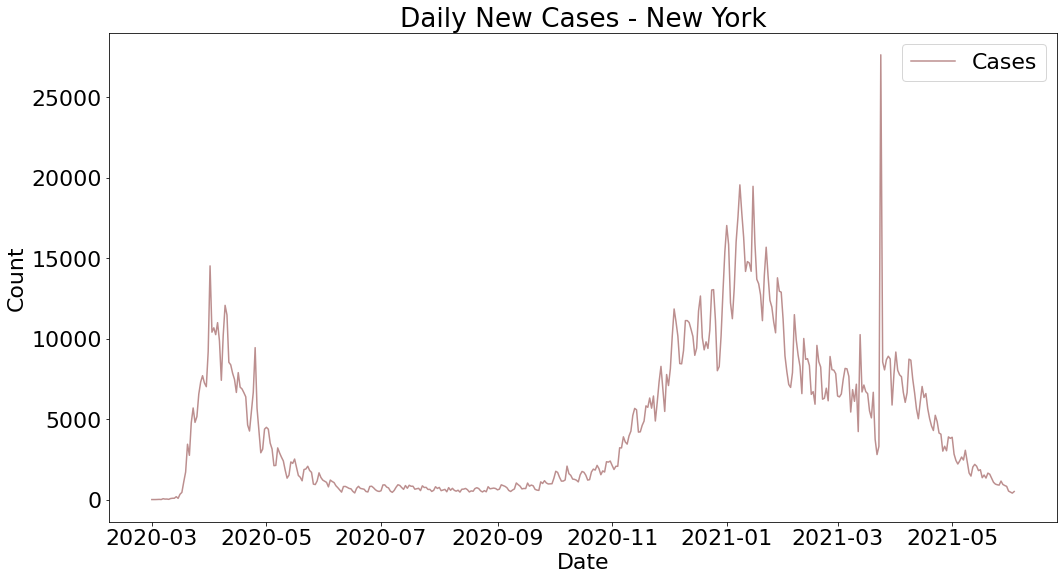

In [13]:
plt.plot(newyork_cases['datetime'].unique(), newyork_cases['cases_new'], label = 'Cases', color = 'rosybrown')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily New Cases - New York')
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.rcParams.update({'font.size': 22})
plt.show()

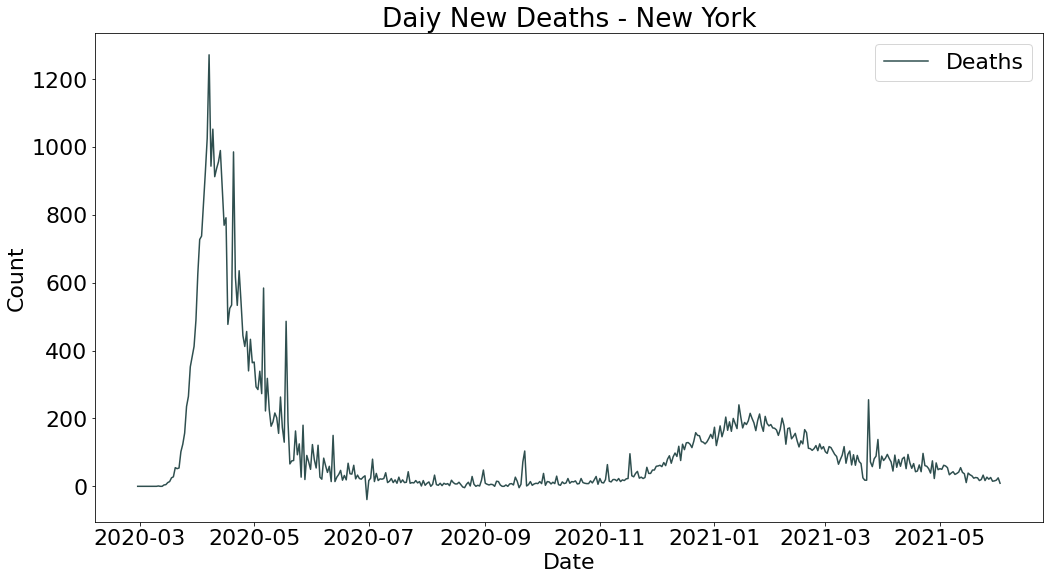

In [14]:
plt.plot(newyork_deaths['datetime'].unique(), newyork_deaths['deaths_new'], label = 'Deaths', color = 'darkslategrey')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daiy New Deaths - New York')
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.rcParams.update({'font.size': 22})
plt.show()

#OxGPT

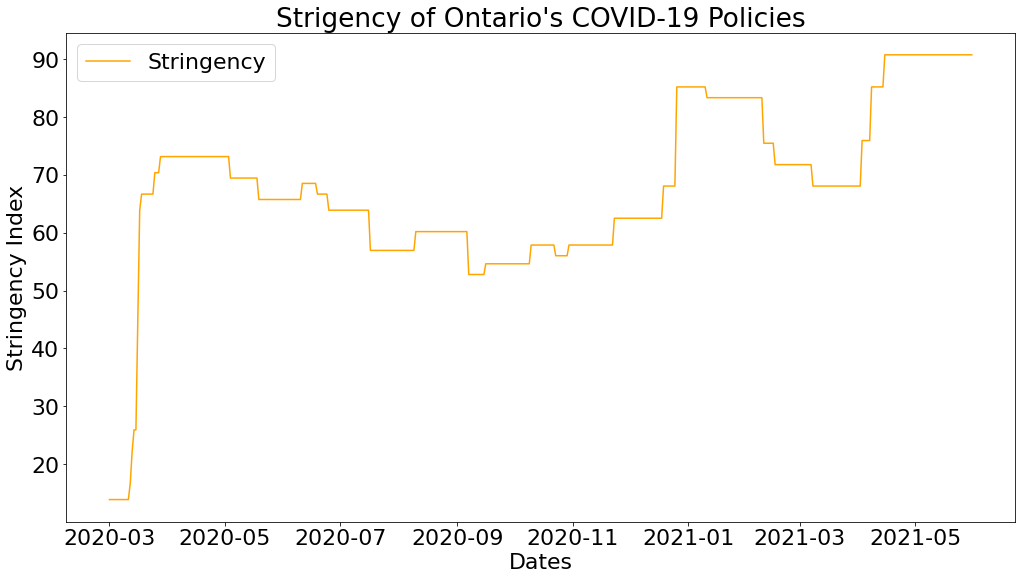

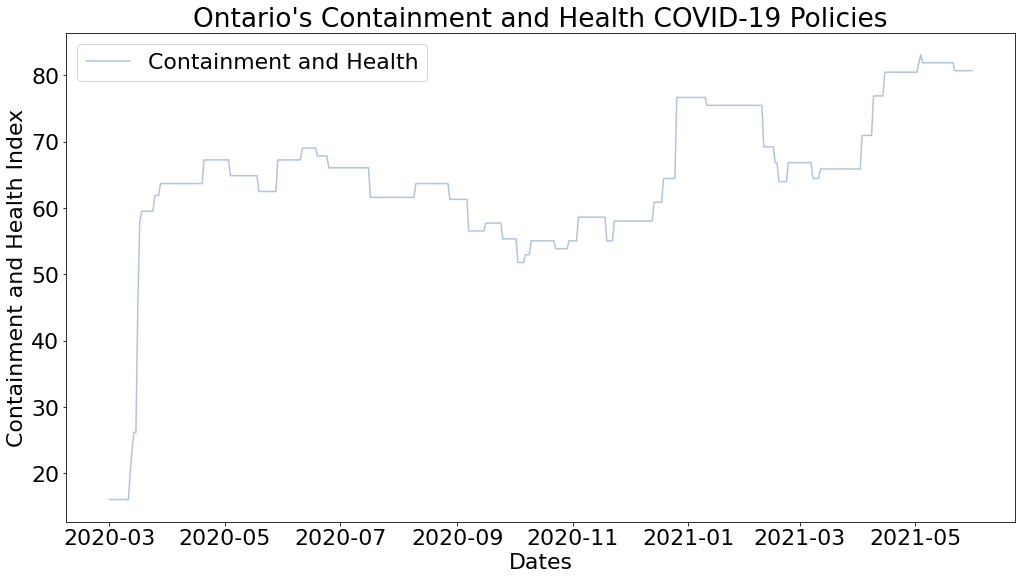

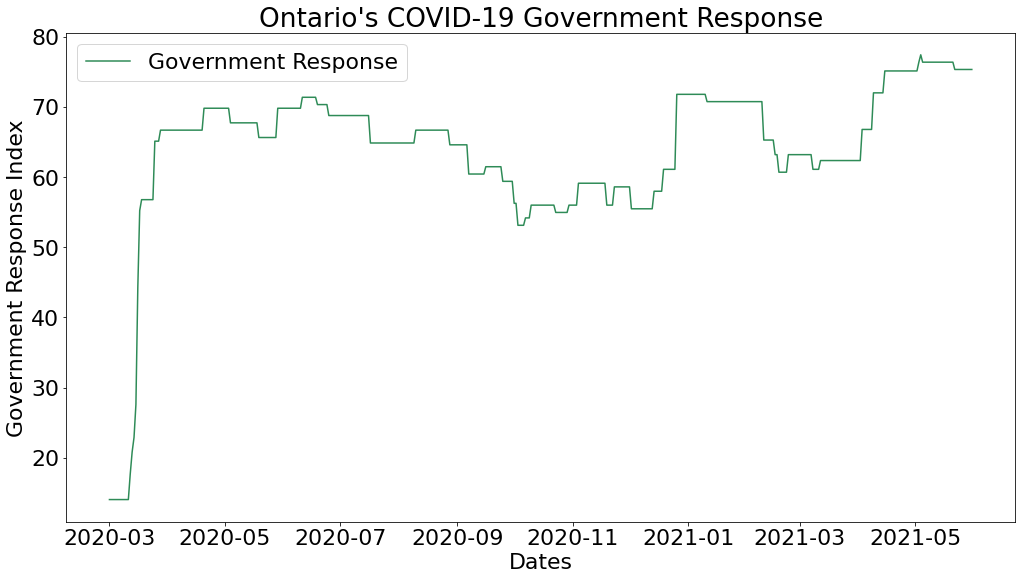

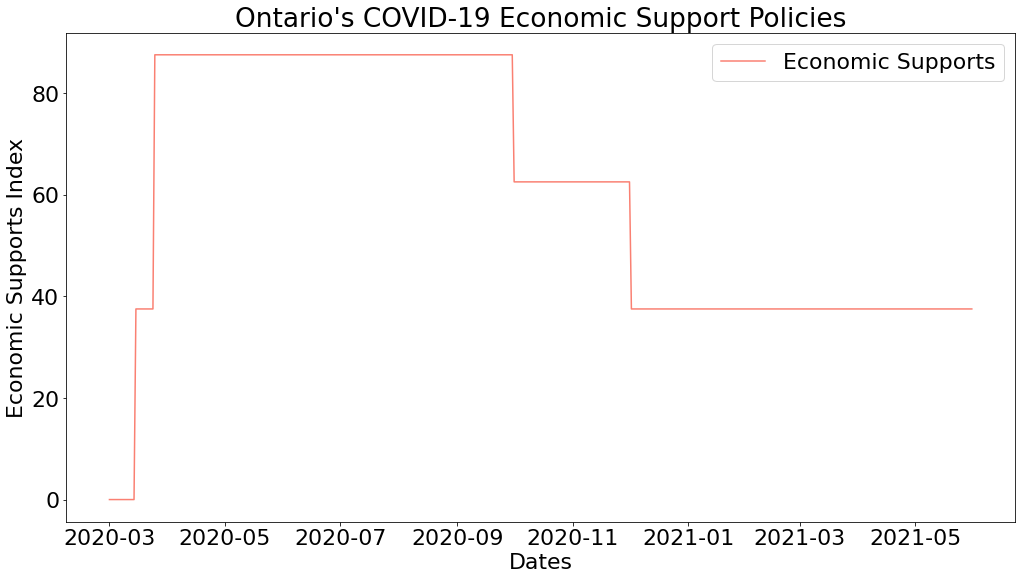

In [15]:
date = ontario['Date'].unique()

stringency_ON = ontario['StringencyIndex']
plt.plot(date, stringency_ON, color = 'orange', label = 'Stringency')
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of Ontario's COVID-19 Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

containment_health_ON = ontario['ContainmentHealthIndex']
plt.plot(date, containment_health_ON, color = 'lightsteelblue', label = 'Containment and Health')
plt.xlabel("Dates")
plt.ylabel("Containment and Health Index")
plt.title("Ontario's Containment and Health COVID-19 Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

gov_response_ON = ontario['GovernmentResponseIndex']
plt.plot(date, gov_response_ON, color = 'seagreen', label = 'Government Response')
plt.xlabel("Dates")
plt.ylabel("Government Response Index")
plt.title("Ontario's COVID-19 Government Response")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


economic_supports_ON = ontario['EconomicSupportIndex']
plt.plot(date, economic_supports_ON, color = 'salmon', label = 'Economic Supports')
plt.xlabel("Dates")
plt.ylabel("Economic Supports Index")
plt.title("Ontario's COVID-19 Economic Support Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

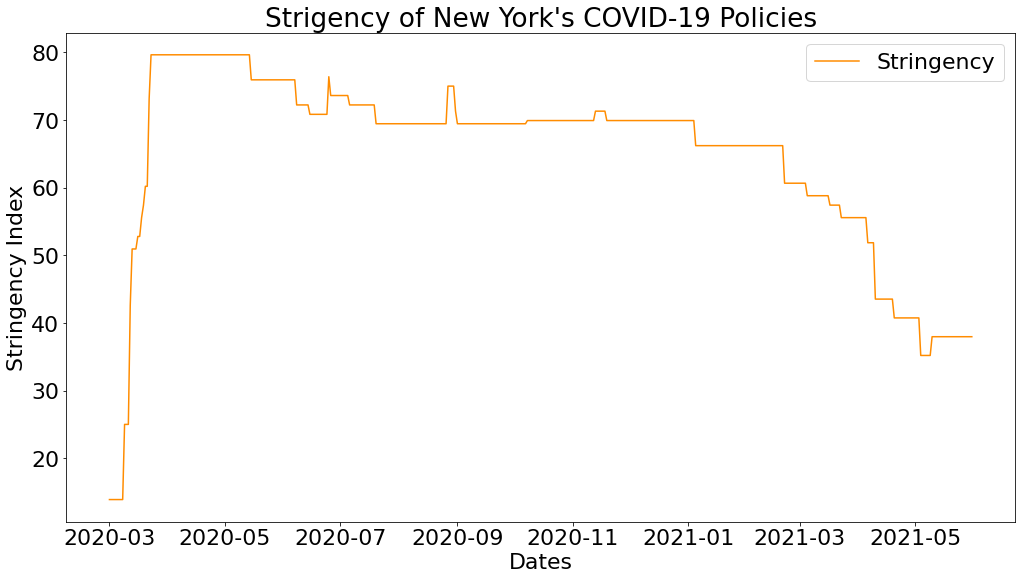

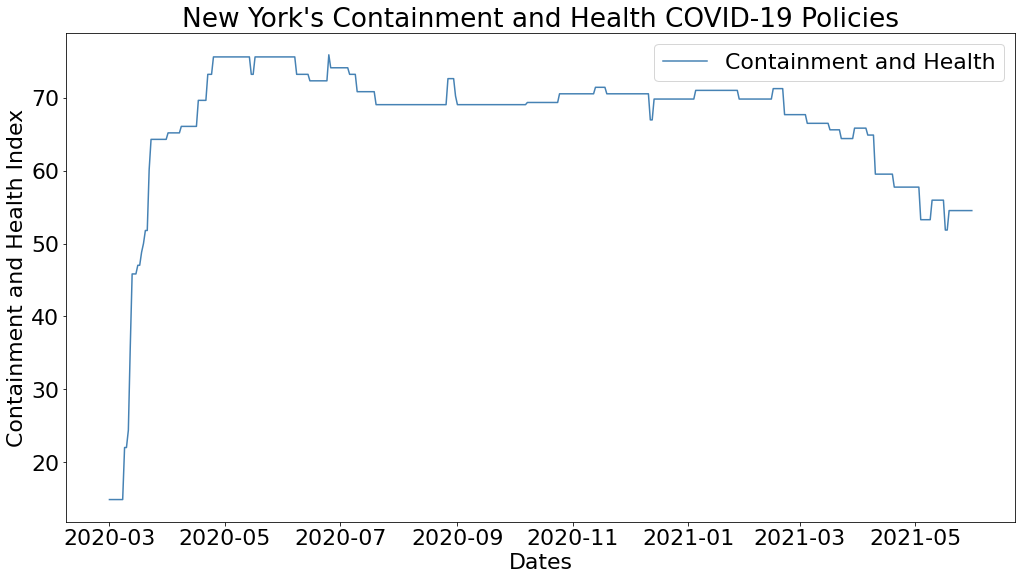

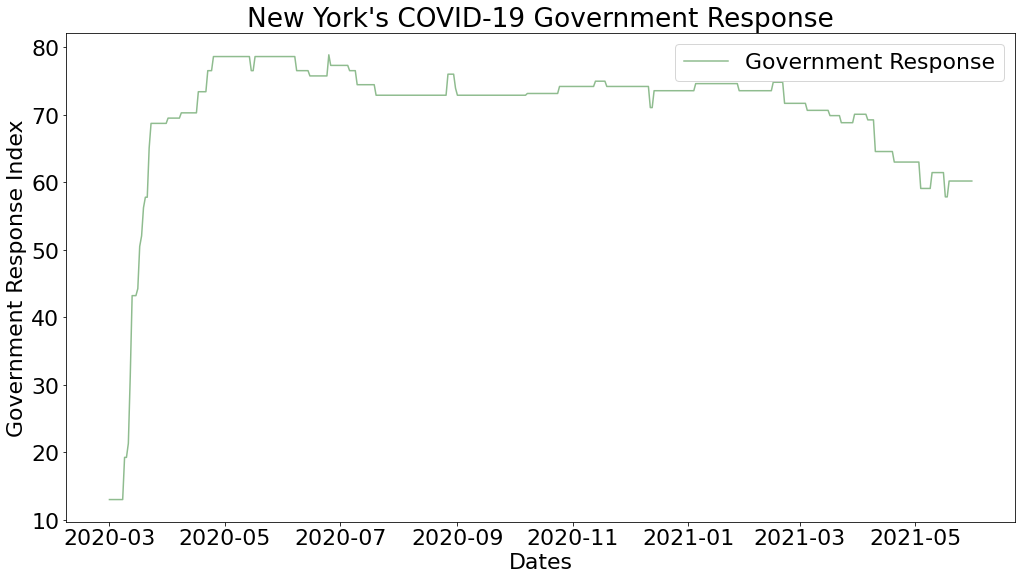

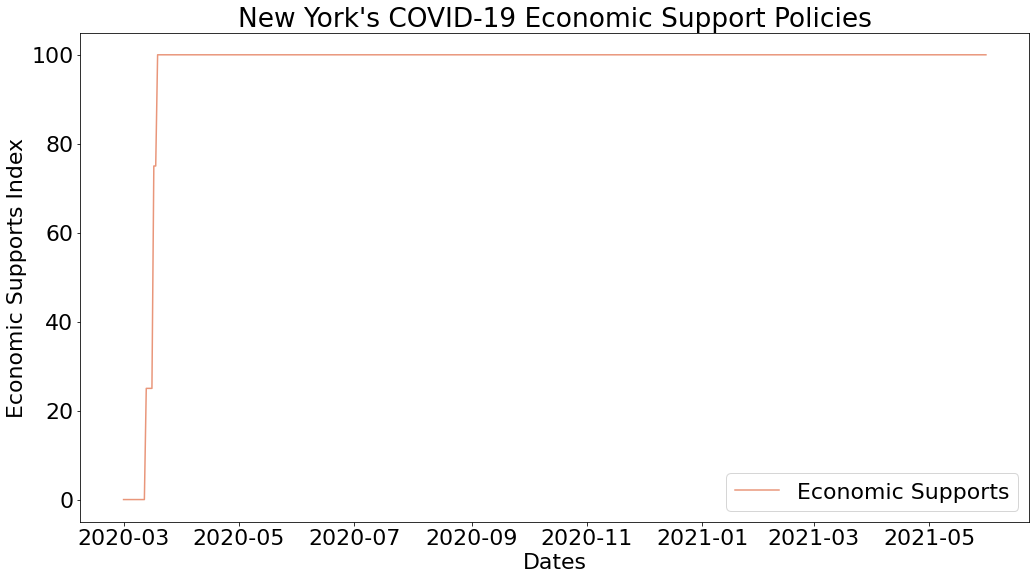

In [16]:
# NEW YORK
date = newyork['Date'].unique()

stringency_NY = newyork['StringencyIndex']
plt.plot(date, stringency_NY, color = 'darkorange', label = 'Stringency')
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of New York's COVID-19 Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

containment_health_NY = newyork['ContainmentHealthIndex']
plt.plot(date, containment_health_NY, color = 'steelblue', label = 'Containment and Health')
plt.xlabel("Dates")
plt.ylabel("Containment and Health Index")
plt.title("New York's Containment and Health COVID-19 Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

gov_response_NY = newyork['GovernmentResponseIndex']
plt.plot(date, gov_response_NY, color = 'darkseagreen', label = 'Government Response')
plt.xlabel("Dates")
plt.ylabel("Government Response Index")
plt.title("New York's COVID-19 Government Response")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


economic_supports_NY = newyork['EconomicSupportIndex']
plt.plot(date, economic_supports_NY, color = 'darksalmon', label = 'Economic Supports')
plt.xlabel("Dates")
plt.ylabel("Economic Supports Index")
plt.title("New York's COVID-19 Economic Support Policies")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

In [24]:
print('ontarios total cases:', ontario_cases['cases'].sum()) # total cases = 538174
print('ontarios total deaths', ontario_mortalities['deaths'].sum()) # deaths  = 8728 

ontarios total cases: 538174
ontarios total deaths 8728


In [23]:
print('New Yorks total cases:',newyork_cases['cases_new'].sum())  # total cases from March 1 2020 - June 1 2020 = 	2102404
print('New Yorks total deaths', newyork_deaths['deaths_new'].sum())  # total deaths 53098	

New Yorks total cases: 2103768.0
New Yorks total deaths 53132.0
